Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

 Importing the dataset

In [2]:
df=pd.read_csv("C:/Users/tejas/Downloads/credit - credit.csv")

To view the first five rows of data

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


To see the columns in the dataset

In [4]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

Checking missing values

In [61]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

There are no missing values in the dataset

Checking Skewnwss

In [69]:
df.skew()

checking_balance        0.004538
months_loan_duration    1.094184
credit_history          1.297794
purpose                -0.245424
amount                  1.949628
savings_balance         0.062229
employment_duration     0.224112
percent_of_income      -0.531348
years_at_residence     -0.272570
age                     1.020739
other_credit           -0.565269
housing                 0.070804
existing_loans_count    1.272576
job                     0.849136
dependents              1.909445
phone                   0.391868
default                 0.874183
dtype: float64

To understand different values in the Default column

In [5]:
df["default"].value_counts(normalize=True)*100

default
no     70.0
yes    30.0
Name: proportion, dtype: float64

"Default" is our Target

Understand the proportion of target

([<matplotlib.patches.Wedge at 0x260fa7cd3d0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'no'),
  Text(0.6465637441936392, -0.8899187180267097, 'yes')],
 [Text(-0.3526711331965305, 0.4854102098327506, '69.999999'),
  Text(0.3526711331965304, -0.48541020983275074, '30.000001')])

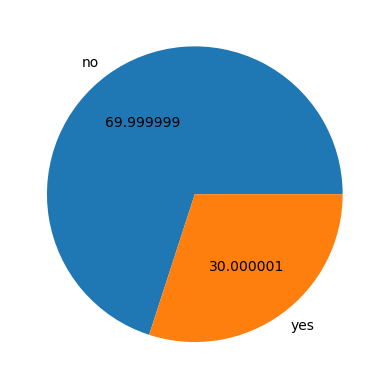

In [6]:
plt.pie(df["default"].value_counts(),labels=["no","yes"],autopct="%2f")

Checking the datatypes of all the columns

In [8]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

## Label Encoding

Converting the text data into numeric

In [9]:
le=LabelEncoder()

In [10]:
l1=le.fit_transform(df["checking_balance"])
l2=le.fit_transform(df["credit_history"])
l3=le.fit_transform(df["purpose"])
l4=le.fit_transform(df["savings_balance"])
l5=le.fit_transform(df["employment_duration"])
l6=le.fit_transform(df["other_credit"])
l7=le.fit_transform(df["housing"])
l8=le.fit_transform(df["job"])
l9=le.fit_transform(df["phone"])
l10=le.fit_transform(df["default"])


In [11]:
df["checking_balance"]=l1
df["credit_history"]=l2
df["purpose"]=l3
df["savings_balance"]=l4
df["employment_duration"]=l5
df["other_credit"]=l6
df["housing"]=l7
df["job"]=l8
df["phone"]=l9
df["default"]=l10

In [12]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1


Plotting heatmap for Correlation

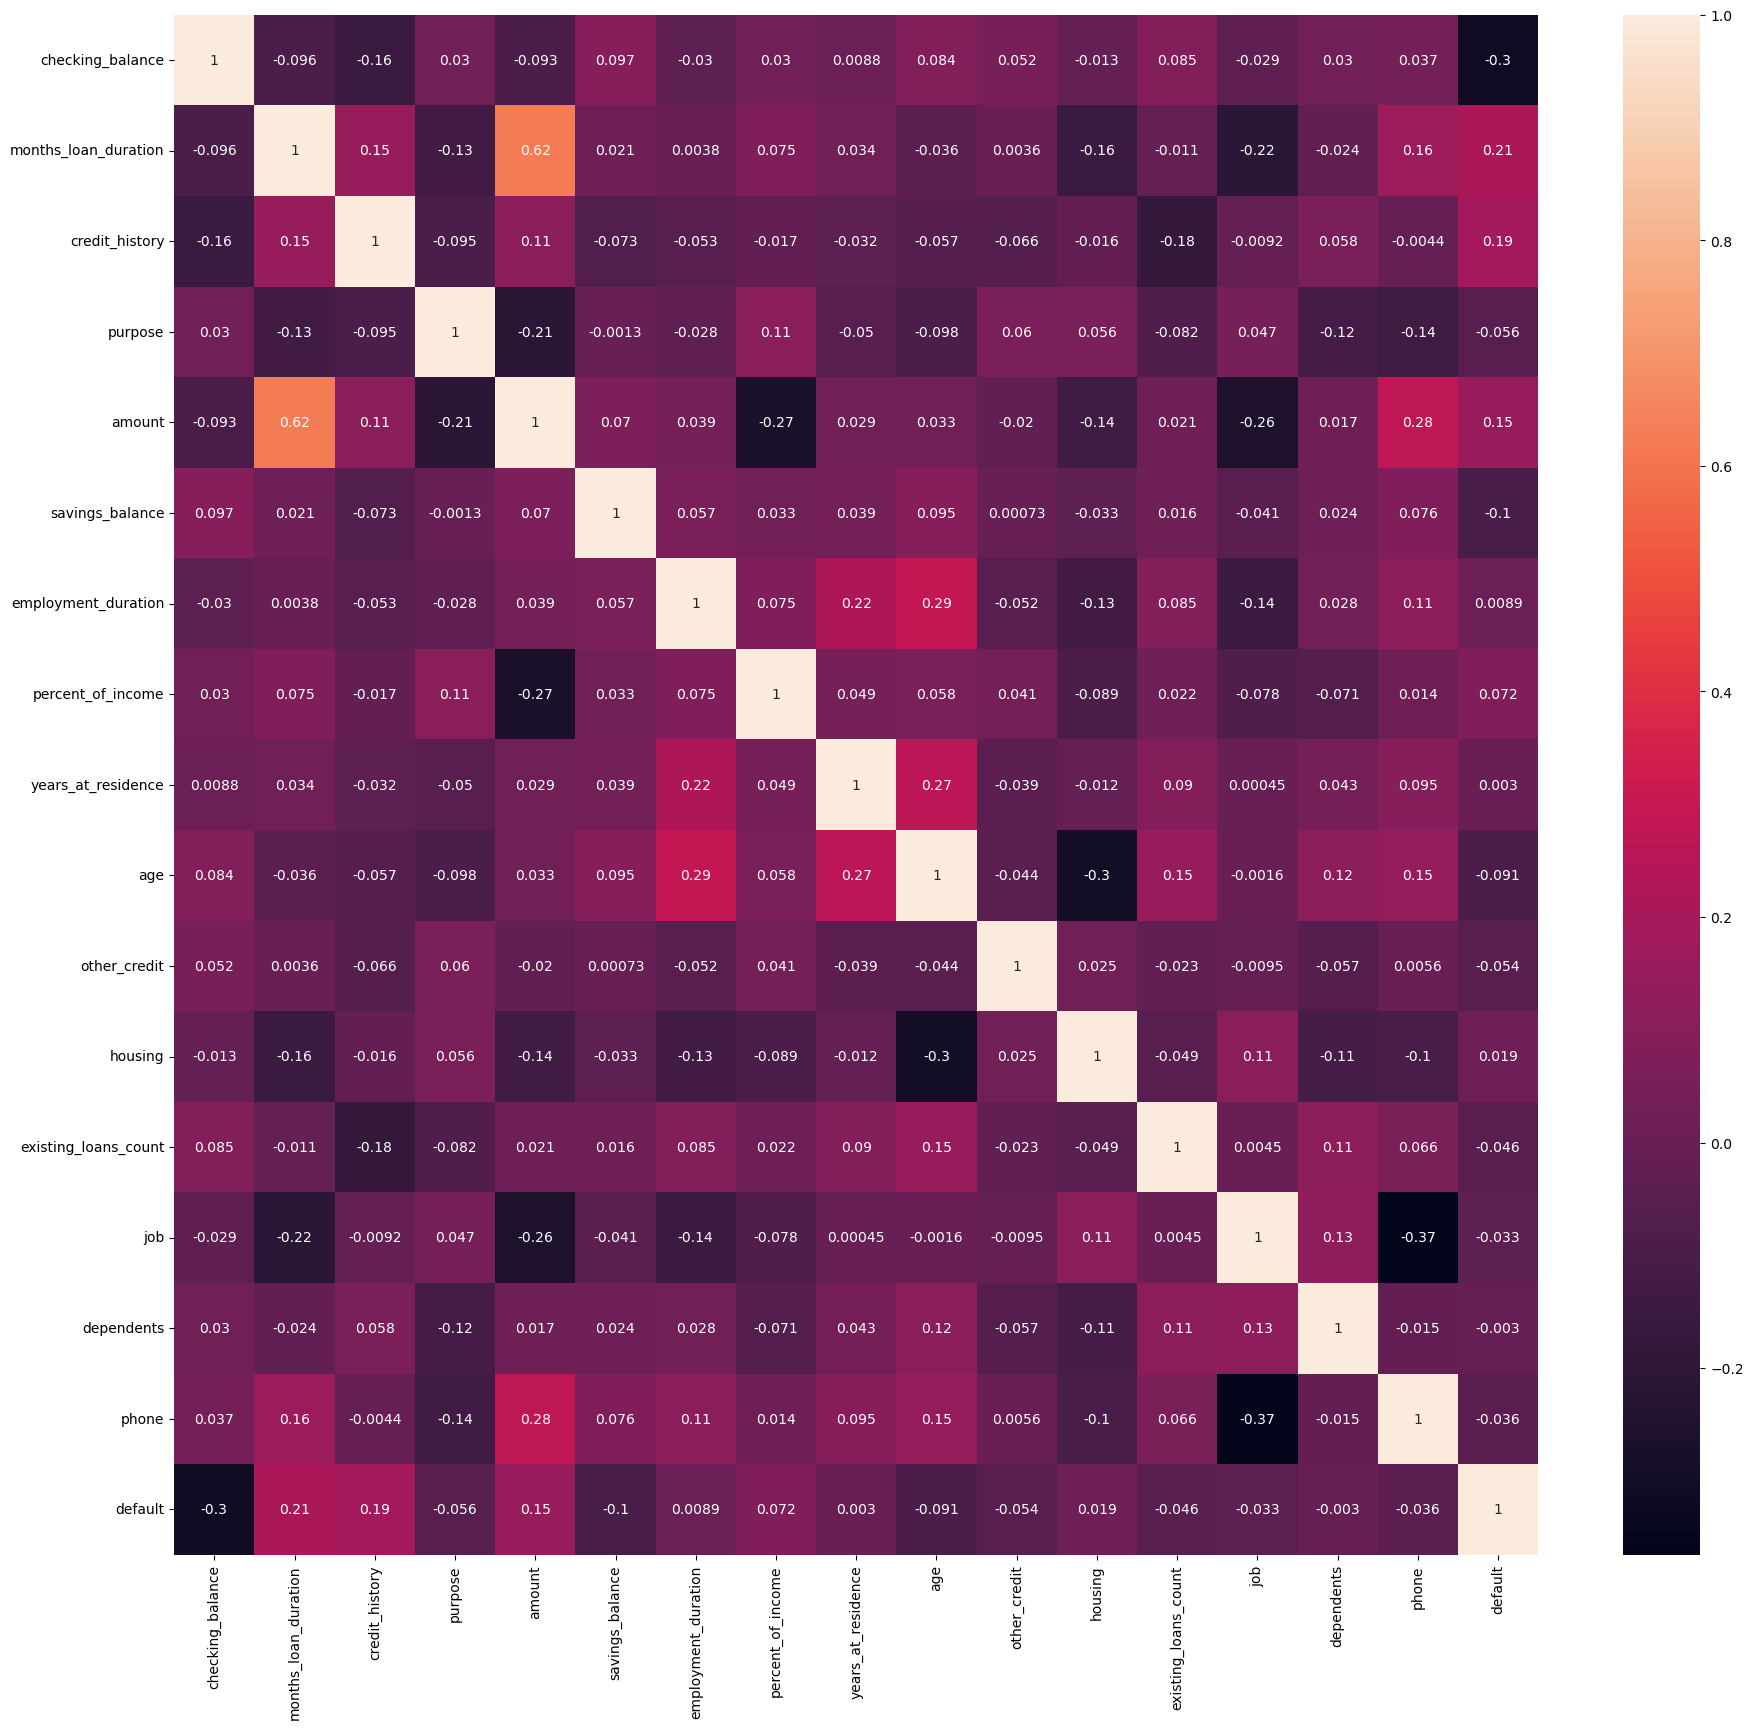

In [68]:
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Spliting data into x and y

In [13]:
x=df.drop(["default"],axis=1)
y=df["default"]

In [62]:
x.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0


In [63]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int32

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 16)
(200, 16)
(800,)
(200,)


# Decision Tree

In [15]:
dc=DecisionTreeClassifier()

In [16]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_true,y_pred=y_test,dc.predict(x_test)

In [18]:
dc.score(x_train,y_train)

1.0

In [19]:
dc.score(x_test,y_test)

0.72

### the model is overfittted

* by appling entropy criterion and maximum depth we can done it underfittited
* more is the depth model will become more fitted

In [20]:
dc1=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [21]:
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
dc1.score(x_train,y_train)*100

72.25

In [23]:
dc1.score(x_test,y_test)*100

71.0

## To draw a decision tree

In [24]:
from IPython.display import Image
from sklearn import tree
from os import system

# feature importance

In [25]:
print(pd.DataFrame(dc1.feature_importances_,columns=["imp"],index=x_train.columns))

                           imp
checking_balance      0.529110
months_loan_duration  0.147067
credit_history        0.062443
purpose               0.048498
amount                0.000000
savings_balance       0.076523
employment_duration   0.000000
percent_of_income     0.000000
years_at_residence    0.000000
age                   0.065215
other_credit          0.071145
housing               0.000000
existing_loans_count  0.000000
job                   0.000000
dependents            0.000000
phone                 0.000000


In [26]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'checking_balance <= 1.5\nentropy = 0.883\nsamples = 800\nvalue = [559, 241]\nclass = no'),
 Text(0.25, 0.625, 'months_loan_duration <= 11.5\nentropy = 0.989\nsamples = 438\nvalue = [246, 192]\nclass = no'),
 Text(0.125, 0.375, 'age <= 32.5\nentropy = 0.667\nsamples = 69\nvalue = [57, 12]\nclass = no'),
 Text(0.0625, 0.125, 'entropy = 0.94\nsamples = 28\nvalue = [18, 10]\nclass = no'),
 Text(0.1875, 0.125, 'entropy = 0.281\nsamples = 41\nvalue = [39, 2]\nclass = no'),
 Text(0.375, 0.375, 'savings_balance <= 2.5\nentropy = 1.0\nsamples = 369\nvalue = [189, 180]\nclass = no'),
 Text(0.3125, 0.125, 'entropy = 0.997\nsamples = 303\nvalue = [142, 161]\nclass = yes'),
 Text(0.4375, 0.125, 'entropy = 0.866\nsamples = 66\nvalue = [47, 19]\nclass = no'),
 Text(0.75, 0.625, 'credit_history <= 0.5\nentropy = 0.572\nsamples = 362\nvalue = [313, 49]\nclass = no'),
 Text(0.625, 0.375, 'other_credit <= 0.5\nentropy = 0.344\nsamples = 140\nvalue = [131, 9]\nclass = no'),
 Text(0.5625

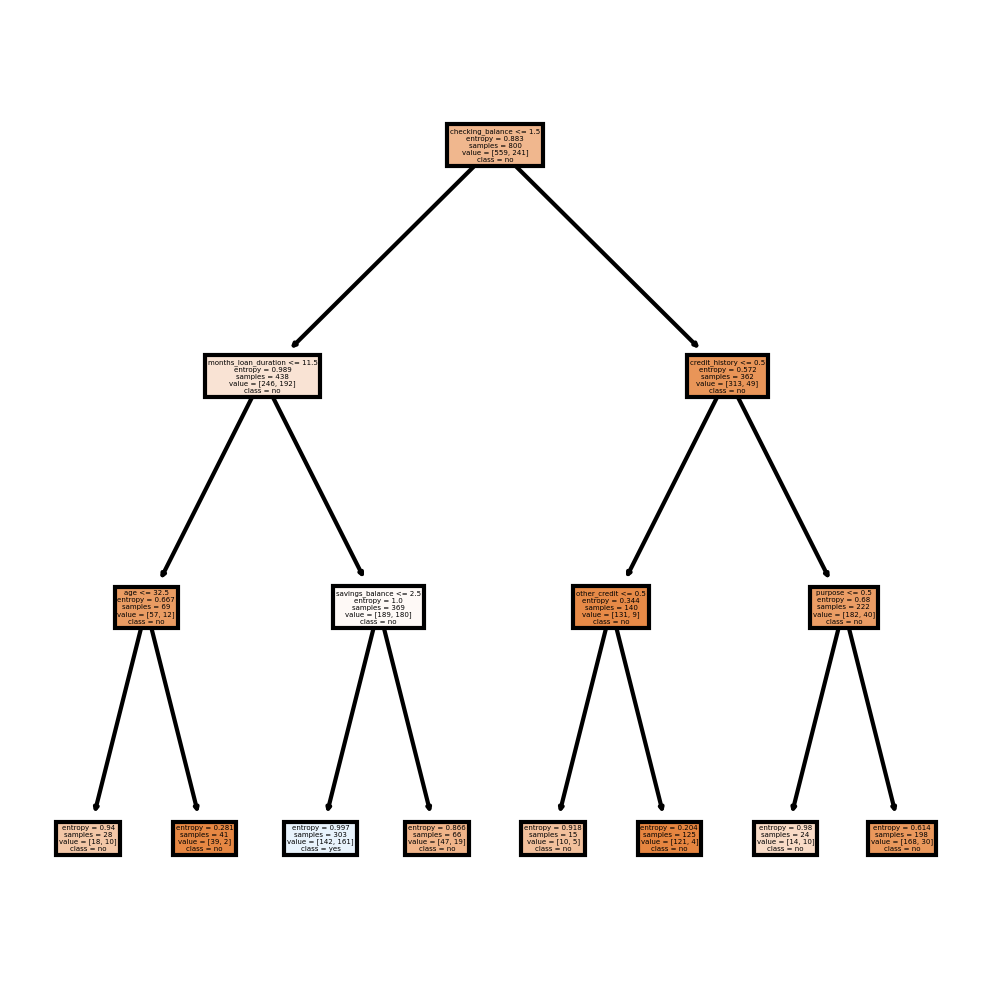

In [27]:
fn=list(x_train)              # fn=feature name
cn=["no","yes"]               # cn=column names
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)                     # dpi=quality
plot_tree(dc1,feature_names=fn,class_names=cn,filled=True)

# Logistic Regression

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_true,y_pred=y_test,lr.predict(x_test)

In [31]:
lr.score(x_train,y_train)*100

71.375

In [32]:
lr.score(x_test,y_test)*100

76.5

 Training Score is 71.37 and testing score is 76.5

# Ensemble learning

### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier(n_estimators=30,random_state=1,max_features=12)       # 30 models are taken

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=12, n_estimators=30, random_state=1)

In [36]:
rf.score(x_train,y_train)*100

99.625

In [37]:
rf.score(x_test,y_test)*100

76.5

 Training Score is 99.62 and testing score is 76.5

### Bagging Classifier

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
bc=BaggingClassifier(base_estimator=dc1,n_estimators=50,random_state=1)

In [40]:
bc.fit(x_train,y_train)

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  n_estimators=50, random_state=1)

In [41]:
bc.score(x_train,y_train)*100

75.875

In [60]:
bc.score(x_test,y_test)*100

73.0

 Training Score is 75.87 and testing score is 73

# Adaboost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ad=AdaBoostClassifier(n_estimators=50,random_state=1)

In [45]:
ad.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [46]:
ad.score(x_train,y_train)*100

78.75

In [47]:
ad.score(x_test,y_test)*100

73.0

 Training Score is 78.75 and testing score is 73

# Gradient boost classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbc=GradientBoostingClassifier(n_estimators=50,random_state=1)

In [50]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [51]:
gbc.score(x_train,y_train)*100

83.625

In [52]:
gbc.score(x_test,y_test)*100

77.0

 Training Score is 83.625 and testing score is 77

# SVM

In [53]:
from sklearn.svm import SVC

In [54]:
s=SVC()

In [56]:
s.fit(x_train,y_train)

SVC()

In [58]:
s.score(x_train,y_train)*100

71.125

In [59]:
s.score(x_test,y_test)*100

71.0

 Training Score is 71.125 and testing score is 71

# Thus, my final model is SVC